<a href="https://colab.research.google.com/github/MaggieHDez/ClassFiles/blob/main/practica25_ValidacionEvaluacionySeleccion_MCHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Mayo 2025
## Práctica 25: Validación, Evaluación y Selección
---


## Datos del Estudiante

*   Apellidos y Nombre: Hernández Delgadillo, Margarita Cristina
*   Matrícula: 255879

---



##  Objetivo de aprendizaje
Aplicar de forma integral el proceso de entrenamiento, ajuste y evaluación de un clasificador tipo Árbol de Decisión sobre un conjunto de datos grande, aplicando técnicas robustas de validación cruzada y optimización de hiperparámetros.

##📦 Dataset sugerido
Usa el conjunto de datos Glioma Grading Clinical and Mutation Features. Este conjunto de datos lo puedes encontrar en https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset


###📝 Actividades

1. Carga de Bibliotecas, Conjunto de Datos y Análisis Exploratorio de los Datos
  - Declarar las bibliotecas necesarias para este proyecto
  - Cargar el conjunto de datos Glioma Grading Clinical and Mutation Features. Se puede descargar de https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset

In [113]:
# Carga de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/drive/MyDrive/ClassFiles/TCGA_InfoWithGrade.csv')

2. 📊 Análisis exploratorio de datos (EDA)\
Realiza un análisis inicial de los datos antes de modelar:

  - Describir forma y estructura (shape, describe(), info()).
  - Mostrar la distribución de clases (y.value_counts()).
  - Visualizar:
    - Histograma de al menos 3 variables numéricas.
    - Boxplots o violin plots por clase si es computacionalmente viable.
    - Mapa de calor de correlaciones entre variables.

  - 🧠 Reflexiona:
    - ¿Existen clases desbalanceadas?
      - La variable Grade(487 casos de 0 y 352 de 1 ó 58% y 42%) y Gender(488 hombres vs. 351 mujeres ó 58% y 42%) muestran un desbalance leve que puede ser acptable mientras que Race si presenta un desbalance grande(765 de 0, 59 de 1, 14 de 2 y 1 de 3) ya que casi todos tienen la misma categoría 0 y es probable que requiera agruparse o descartar.
    - ¿Qué atributos parecen más informativos?
      - Age_at_diagnosis muestra que los pacientes con Grade=1 se diagnostican en una edad más avanzada.
      - Las mutaciones (IDH1, TP53, ATRX, etc.) no muestran correlaciones fuertes con Grade de forma directa al realizar el EDA.
      - Race por su desbalance, tal vez pueda/deba eliminarse o agruparse.


Primeras 5 filas
    Grade  Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  \
0      0       0             51.30     0     1     0     0     0     0    0   
1      0       0             38.72     0     1     0     0     0     0    1   
2      0       0             35.17     0     1     1     1     0     0    0   
3      0       1             32.78     0     1     1     1     0     0    0   
4      0       0             31.51     0     1     1     1     0     0    0   

   ...  FUBP1  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  PDGFRA  
0  ...      1    0       0     0      0        0       0     0     0       0  
1  ...      0    0       0     0      0        0       0     0     0       0  
2  ...      0    0       0     0      0        0       0     0     0       0  
3  ...      0    0       0     0      0        0       0     0     1       0  
4  ...      0    0       0     0      0        0       0     0     0       0  

[5 rows x 24 columns]
Número de 

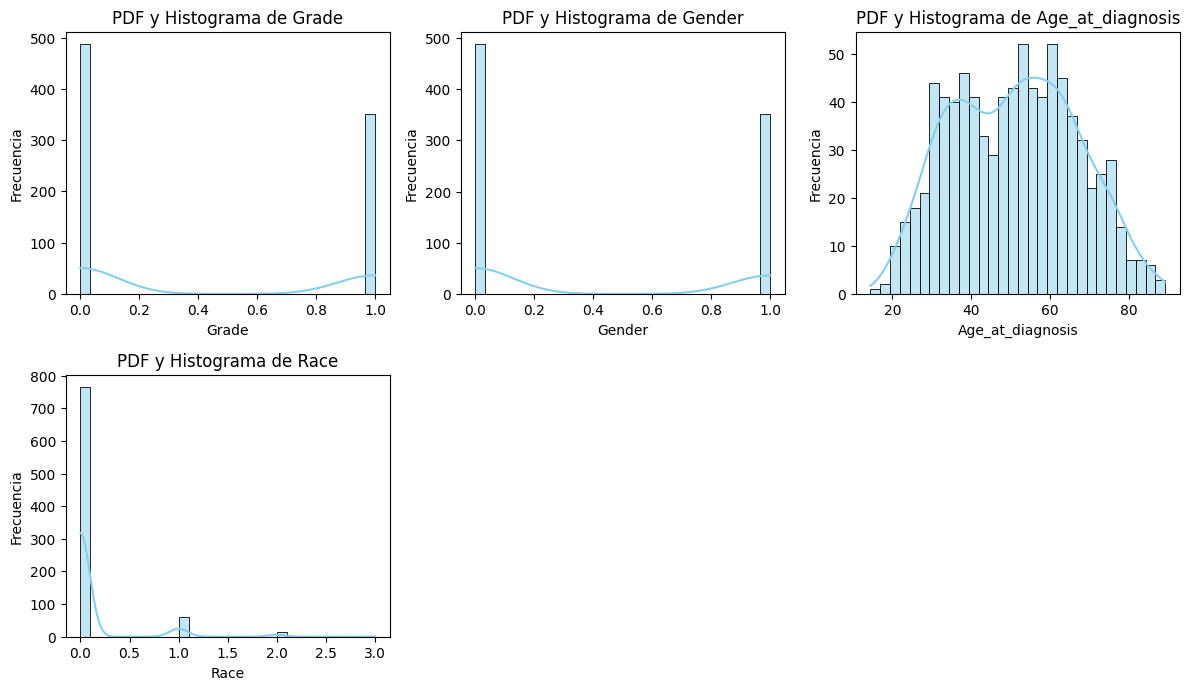

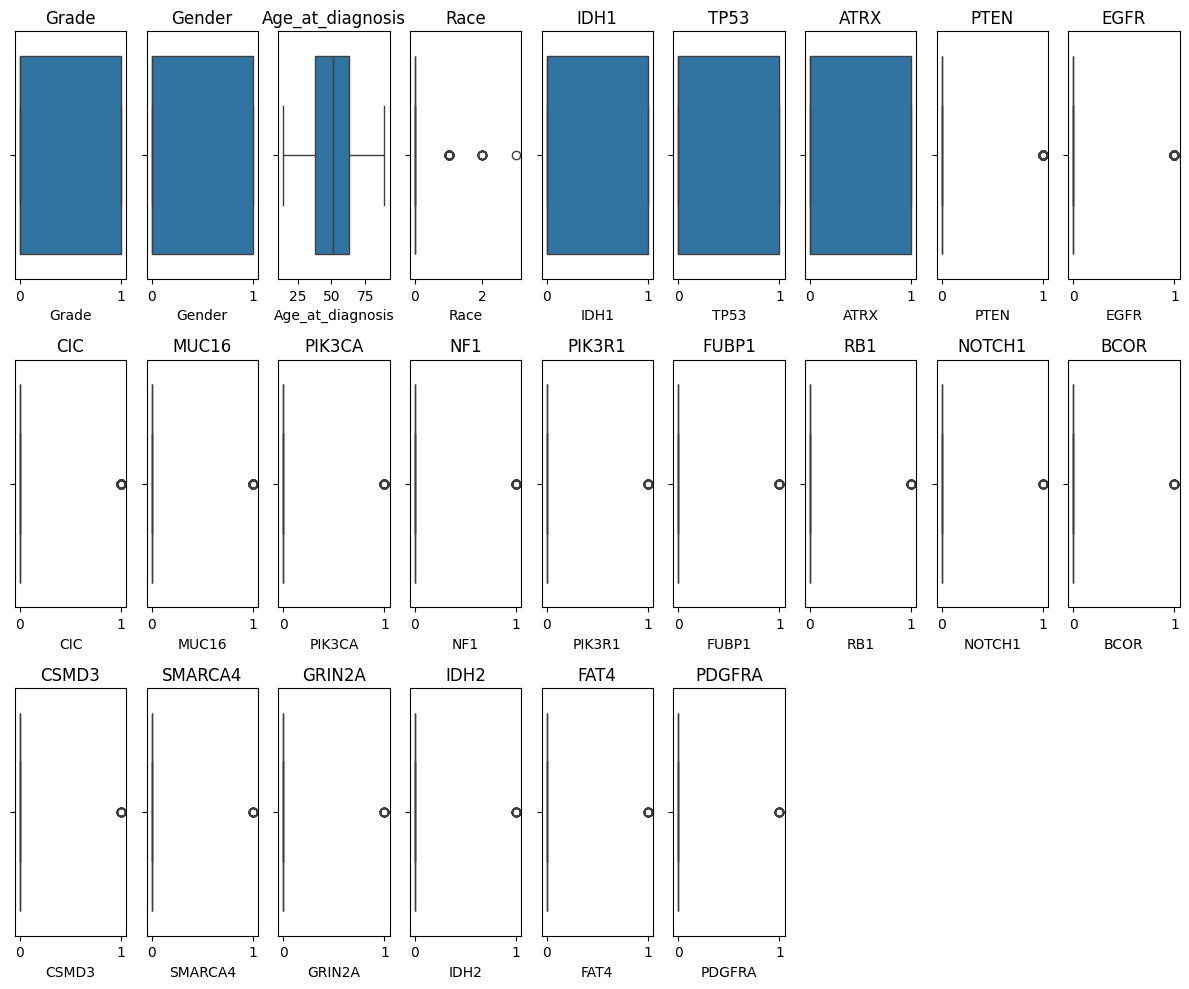

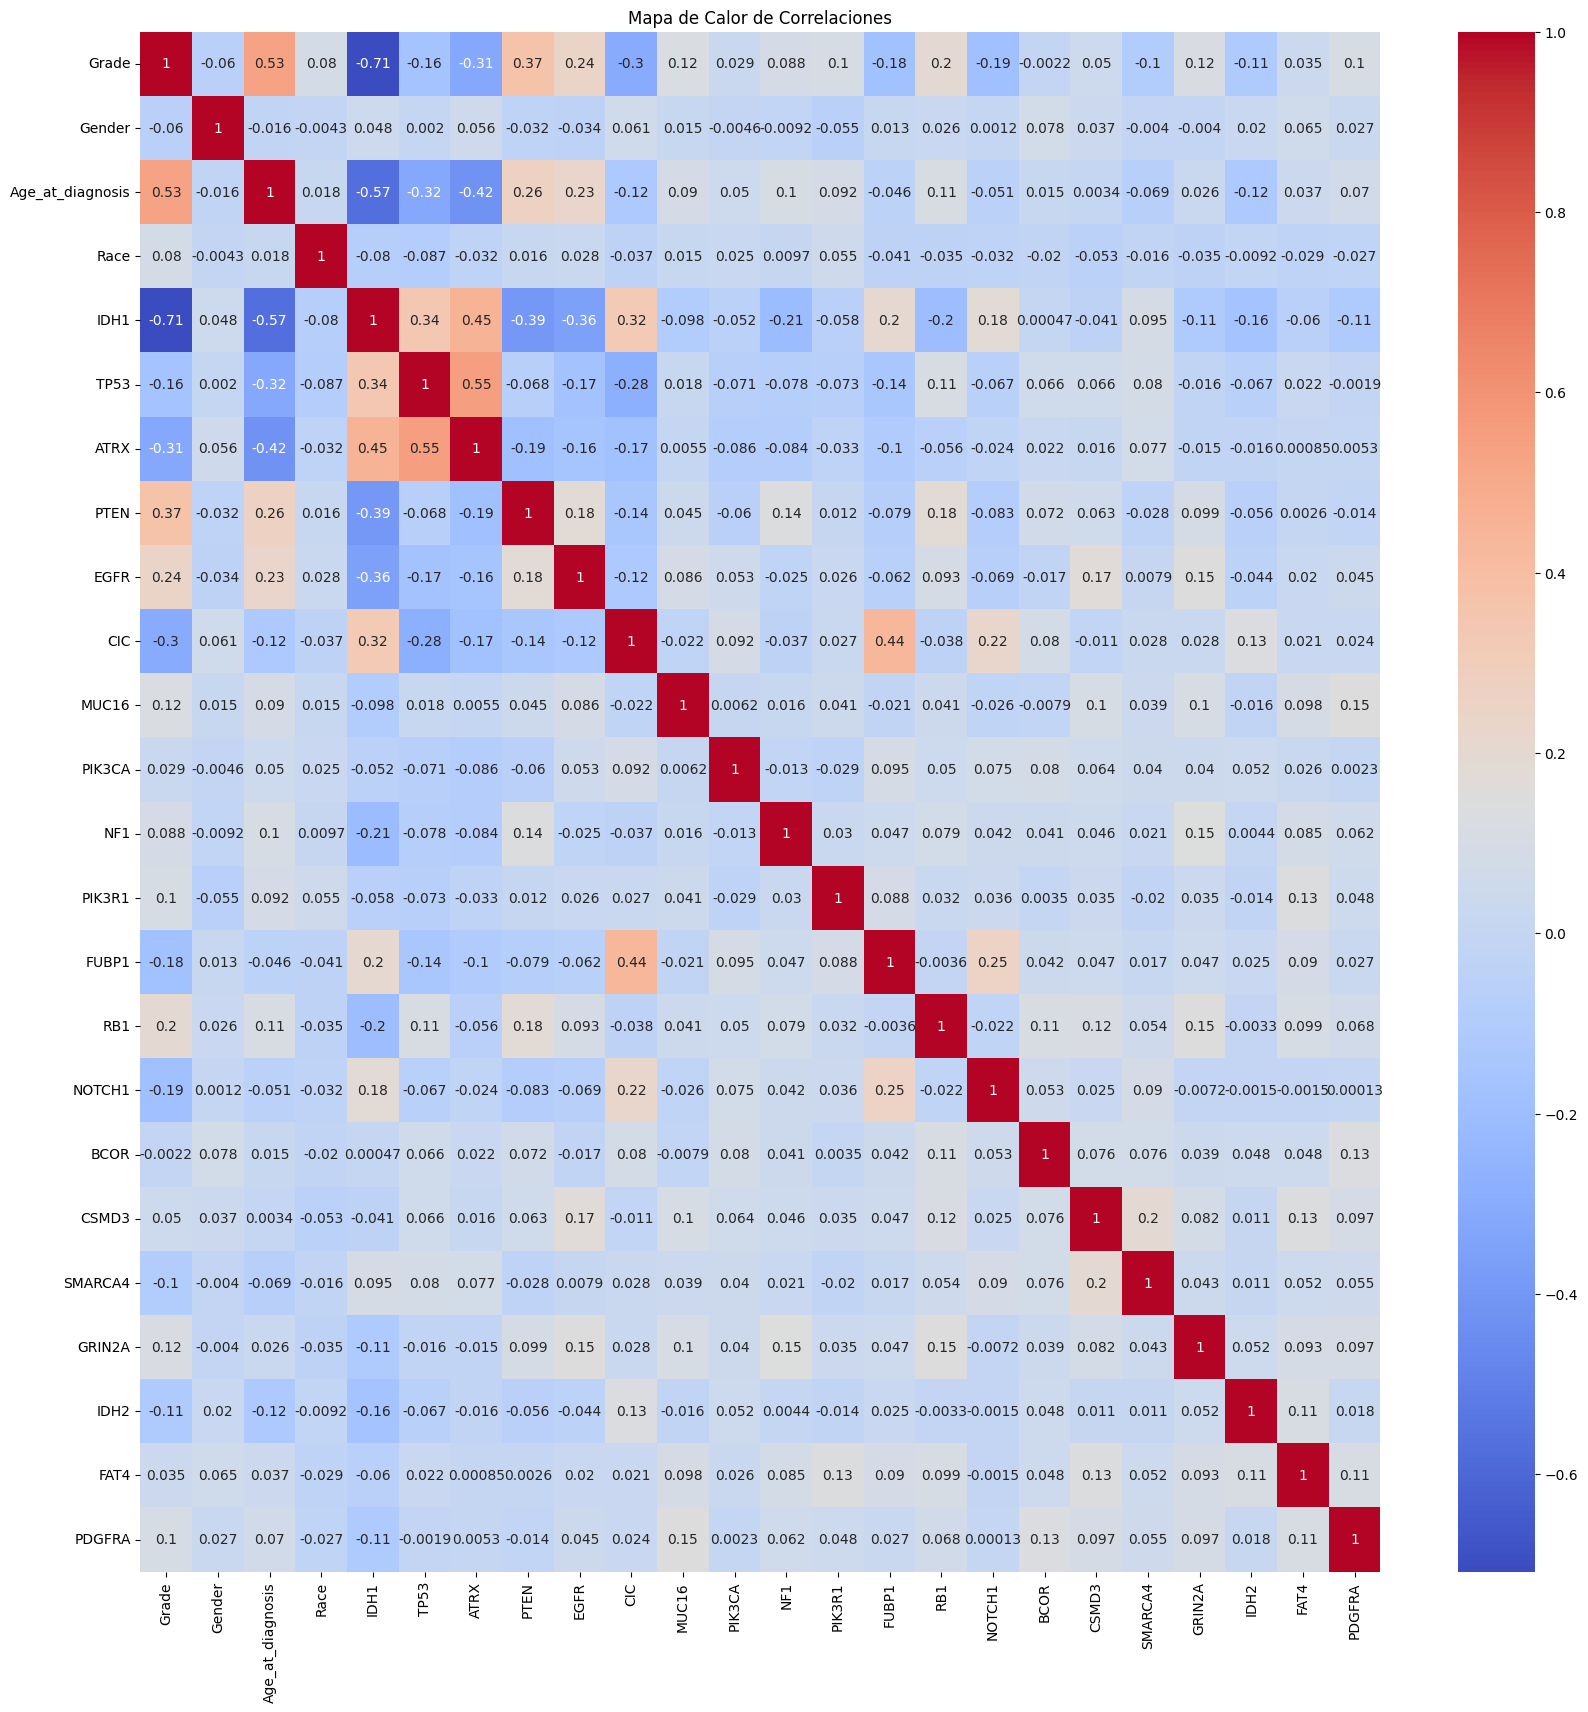

In [121]:
# Inspección inicial
# Primeras 5 filas
print('Primeras 5 filas\n', df.head())

# Observaciones y atributos
observaciones, atributos = df.shape
print('Número de observaciones:', observaciones)
print('Número de atributos:', atributos)

# Descripción inicial
print('\nDescripción de los datos\n',df.describe())

# Información de los datos
print(df.info())

#Obtenemos la moda de cada una de las columnas(el describe no la ofrece por si sola)
# Obtener la moda de cada columna
moda = df.mode().iloc[0]  # .iloc[0] toma solo el primer valor en caso de múltiples modas

# Mostrar la moda de cada columna
print("Moda de cada columna:")
print(moda)
print('\n')

# Verificar valores faltantes
print("Valores faltantes:")
print(df.isnull().sum())

# Distribución de clases
print('\nDistribución de clases: Grade\n', df['Grade'].value_counts())
print('\nDistribución de clases %: Grade\n', df['Grade'].value_counts(normalize=True)*100)
print('\nDistribución de clases: Gender\n', df['Gender'].value_counts())
print('\nDistribución de clases %: Gender\n', df['Gender'].value_counts(normalize=True)*100)
print('\nDistribución de clases: Race\n', df['Race'].value_counts())
print('\nDistribución de clases %: Race\n', df['Race'].value_counts(normalize=True)*100)

# Histograma de primeras 4 columnas
columnas = df.iloc[:, 0:4]
# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 10))
for i, col in enumerate(columnas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

# Seleccionar solo columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear boxplots para cada columna numérica
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(3, 9, i)  # 2 filas, 4 columnas de subplots
    sns.boxplot(x=df[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

# Mapa de correlaciones
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

3. Gráfica de Errores en Entrenamiento y Prueba
  - En este ejercicio vas a entrenar un árbol de decisión con diferentes profundidades. Asimismo, en gráfica mostrarás las exactitudes en entrenamiento y test, usando un stratified k-fold cross-validation con K= 10
  - Los valores de las profundides a evaluar son 2, 5, 10, 15, 20, 25, 30 y None
  - Deberás usar StratifiedKFold con 10 particiones, y un valor aleatorio de 3
  - Entrenarás y evaluarás un árbol de decisión con estos distintos valores de profundidades
  - Usa cross_val_score para entrenar los modelos, usando como métrica de evaluación en scoring ="f1_macro",y el StratifiedKFold, con un valor aleatorio = 7
  - Muestra una gráfica para los distintos resultados  cuando se usa F1 Macro


******* Resultados con random_state = 3 *******
Profundidad=2
Train=0.8691
Test=0.8665

Profundidad=5
Train=0.8857
Test=0.8553

Profundidad=10
Train=0.9286
Test=0.8265

Profundidad=15
Train=0.9747
Test=0.7929

Profundidad=20
Train=0.9953
Test=0.8004

Profundidad=25
Train=0.9988
Test=0.8025

Profundidad=30
Train=1.0000
Test=0.7996

Profundidad=None
Train=1.0000
Test=0.7996


******* Resultados con random_state = 7 *******
Profundidad=2
Train=0.8691
Test=0.8678

Profundidad=5
Train=0.8867
Test=0.8541

Profundidad=10
Train=0.9282
Test=0.8111

Profundidad=15
Train=0.9790
Test=0.8018

Profundidad=20
Train=0.9958
Test=0.7963

Profundidad=25
Train=0.9996
Test=0.7887

Profundidad=30
Train=1.0000
Test=0.7899

Profundidad=None
Train=1.0000
Test=0.7899



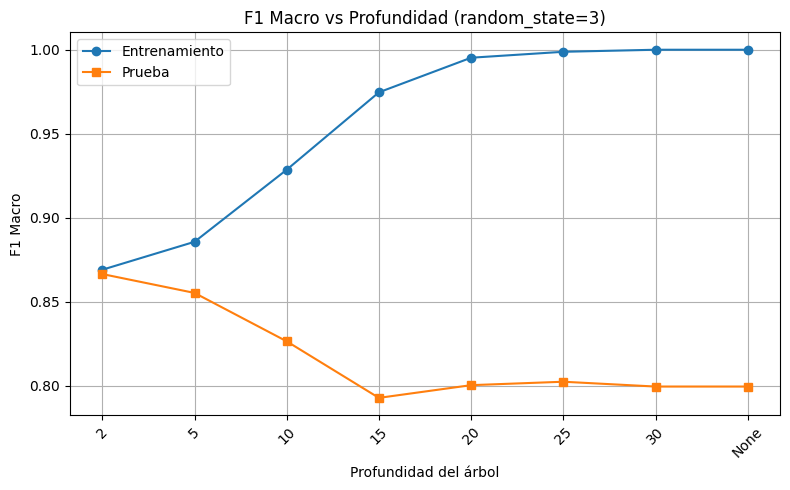

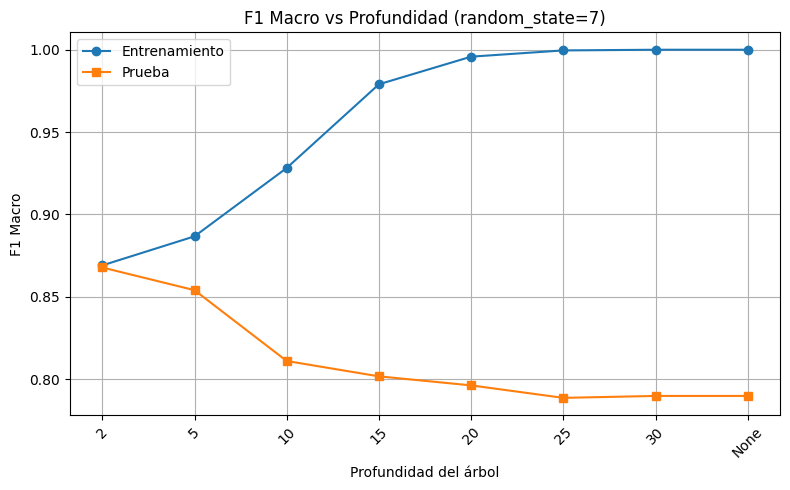

In [115]:
# Separación
X = df.drop('Grade', axis=1)
y = df['Grade']

# Parametros
profundidades = [2, 5, 10, 15, 20, 25, 30, None]
k = 10
random_states = [3, 7]
scoring = 'f1_macro'
train_results = {state: [] for state in random_states}
test_results = {state: [] for state in random_states}

for states in random_states:
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=states)
    print(f"\n******* Resultados con random_state = {states} *******")
    for profundidad in profundidades:
        clf = DecisionTreeClassifier(max_depth=profundidad, random_state=states)
        resultados = cross_validate(clf, X, y, cv=skf,
                             scoring=scoring,
                             return_train_score=True)
        train_results[states].append(np.mean(resultados['train_score']))
        test_results[states].append(np.mean(resultados['test_score']))
        print(f"Profundidad={profundidad}\nTrain={resultados['train_score'].mean():.4f}\nTest={resultados['test_score'].mean():.4f}\n")

# Graficar para cada random_state
for states in random_states:
    plt.figure(figsize=(8, 5))
    etiquetas = [str(d) for d in profundidades]
    plt.plot(etiquetas, train_results[states], marker='o', label='Entrenamiento')
    plt.plot(etiquetas, test_results[states], marker='s', label='Prueba')
    plt.xlabel('Profundidad del árbol')
    plt.ylabel('F1 Macro')
    plt.title(f'F1 Macro vs Profundidad (random_state={states})')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

4. Optimización de hiperparámetros con RandomizedSearchCV
  - Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:
    - Criterion = gini ,entropy
    - max_depth: de 5 a 50 con incrementos de 1
    - min_samples_split: de 2 a 20 con incrementos de 1
  - Usa el árbol de decisión
  - StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
  - n_iter = 5 (combinaciones aleatorias a buscar)
  - n_jobs = -1 para acelerar cómputo
  - Métrica de evaluación: f1 Macro
  - Imprime los mejores hiperparámetros encontrados
  - Imprime el best_score

In [116]:
# Parámetros
criterion = ['gini', 'entropy']
max_depth = range(5, 51, 1)
min_samples_split = range(2, 21, 1)
tree_params = {'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
n_iter = 5
n_jobs = -1
scoring = 'f1_macro'
random_state = 42

# Clasificador
clf = DecisionTreeClassifier(random_state=42)
# Estrategia
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)
# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf,
                                   param_distributions=tree_params,
                                   n_iter=n_iter,
                                   cv=skf,
                                   scoring=scoring,
                                   n_jobs=n_jobs)

# Fit
random_search.fit(X, y)

# Resultados
print(f"Mejores hiperparámetros random_search: {random_search.best_params_}\n")
print(f"Mejor puntaje F1 Macro random_search: {random_search.best_score_:.4f}")

tabla_comparacion=pd.DataFrame()
tabla_comparacion['RS F1 macro - best_param'] = random_search.best_params_
tabla_comparacion['RS F1 macro - best_score'] = random_search.best_score_

Mejores hiperparámetros random_search: {'min_samples_split': 7, 'max_depth': 12, 'criterion': 'entropy'}

Mejor puntaje F1 Macro random_search: 0.8404


5. Optimización de hiperparámetros con GridSearchCV

  - Define el espacio de búsqueda  para los siguientes hiperpárametros:
    - Criterion = gini ,entropy
    - max_depth: de 5 a 50 con incrementos de 1
    - min_samples_split: de 2 a 20 con incrementos de 1
  - Usa el árbol de decisión
  - StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
  - Métrica de evaluación: f1 Macro
  - n_jobs = -1 para acelerar cómputo
  - Imprime los mejores hiperparámetros encontrados
  - Imprime el best_score

In [117]:
# Parámetros
criterion = ['gini', 'entropy']
max_depth = range(5, 51, 1)
min_samples_split = range(2, 21, 1)
tree_params = {'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
n_jobs = -1
scoring = 'f1_macro'
random_state = 42

# Clasificador
clf = DecisionTreeClassifier(random_state=42)
# Estrategia
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)
# GridSearchCV
grid_search = GridSearchCV(estimator=clf,
                           param_grid=tree_params,
                           cv=skf,
                           scoring=scoring,
                           n_jobs=n_jobs)

# Fit
grid_search.fit(X, y)

# Resultados
print(f"Mejores hiperparámetros grid_search: {grid_search.best_params_}\n")
print(f"Mejor puntaje F1 Macro grid_search: {grid_search.best_score_:.4f}")

tabla_comparacion['GS F1 macro - best_param'] = grid_search.best_params_
tabla_comparacion['GS F1 macro - best_score'] = grid_search.best_score_

Mejores hiperparámetros grid_search: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 12}

Mejor puntaje F1 Macro grid_search: 0.8641


6. Optimización de hiperparámetros con RandomizedSearchCV: Accuracy
  - Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:
    - Criterion = gini ,entropy
    - max_depth: de 5 a 50 con incrementos de 1
    - min_samples_split: de 2 a 20 con incrementos de 1
  - Usa el árbol de decisión
  - StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
  - n_iter = 5 (combinaciones aleatorias a buscar)
  - n_jobs = -1 para acelerar cómputo
  - Métrica de evaluación: accuracy
  - Imprime los mejores hiperparámetros encontrados
  - Imprime el best_score

In [118]:
# Parámetros
criterion = ['gini', 'entropy']
max_depth = range(5, 51, 1)
min_samples_split = range(2, 21, 1)
tree_params = {'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
n_iter = 5
n_jobs = -1
scoring = 'accuracy'

# Clasificador
clf = DecisionTreeClassifier(random_state=42)
# Estrategia
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_search = RandomizedSearchCV(estimator=clf,
                                   param_distributions=tree_params,
                                   n_iter=n_iter,
                                   cv=skf,
                                   scoring=scoring,
                                   n_jobs=n_jobs)

# Fit
accuracy_search.fit(X, y)

# Resultados
print(f"Mejores hiperparámetros accuracy_search: {accuracy_search.best_params_}\n")
print(f"Mejor puntaje Accuracy accuracy_search: {accuracy_search.best_score_:.4f}")

tabla_comparacion['RS Accuracy - best_param'] = accuracy_search.best_params_
tabla_comparacion['RS Accuracy - best_score'] = accuracy_search.best_score_

Mejores hiperparámetros accuracy_search: {'min_samples_split': 20, 'max_depth': 43, 'criterion': 'gini'}

Mejor puntaje Accuracy accuracy_search: 0.8308


7. Optimización de hiperparámetros con GridSearchCV: accuracy

  - Define el espacio de búsqueda  para los siguientes hiperpárametros:
    - Criterion = gini ,entropy
    - max_depth: de 5 a 50 con incrementos de 1
    - min_samples_split: de 2 a 20 con incrementos de 1
  - Usa el árbol de decisión
  - StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
  - Métrica de evaluación: f1 Macro
  - n_jobs = -1 para acelerar cómputo
  - Imprime los mejores hiperparámetros encontrados
  - Imprime el best_score

In [119]:
# Parámetros
criterion = ['gini', 'entropy']
max_depth = range(5, 51, 1)
min_samples_split = range(2, 21, 1)
tree_params = {'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
n_jobs = -1
scoring = 'accuracy'

# Clasificador
clf = DecisionTreeClassifier(random_state=42)
# Estrategia
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

accuracy_grid_search = GridSearchCV(estimator=clf,
                           param_grid=tree_params,
                           cv=skf,
                           scoring=scoring,
                           n_jobs=n_jobs)

# Fit
accuracy_grid_search.fit(X, y)

# Resultados
print(f"Mejores hiperparámetros accuracy_grid_search: {accuracy_grid_search.best_params_}\n")
print(f"Mejor puntaje Accuracy accuracy_grid_search: {accuracy_grid_search.best_score_:.4f}")

tabla_comparacion['GS Accuracy - best_param'] = accuracy_grid_search.best_params_
tabla_comparacion['GS Accuracy - best_score'] = accuracy_grid_search.best_score_

Mejores hiperparámetros accuracy_grid_search: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 12}

Mejor puntaje Accuracy accuracy_grid_search: 0.8653


In [120]:
print(tabla_comparacion)

                  RS F1 macro - best_param  RS F1 macro - best_score  \
min_samples_split                        7                  0.840421   
max_depth                               12                  0.840421   
criterion                          entropy                  0.840421   

                  GS F1 macro - best_param  GS F1 macro - best_score  \
min_samples_split                       12                  0.864118   
max_depth                                5                  0.864118   
criterion                          entropy                  0.864118   

                  RS Accuracy - best_param  RS Accuracy - best_score  \
min_samples_split                       20                   0.83078   
max_depth                               43                   0.83078   
criterion                             gini                   0.83078   

                  GS Accuracy - best_param  GS Accuracy - best_score  
min_samples_split                       12                  0.

8. Actividad de reflexión y análisis
  - ¿Cuál método encontró mejores hiperparámetros?
    - En general **GridSearchCV** obtuvo los mejores resultados en ambos casos. F1 Macro: **0.864118** y en Accuracy: **0.865318**, en comparación con **RandomizedSearchCV** - F1 Macro: **0.840421** y Accuracy: **0.83078**
  - ¿Cuál fue más costoso computacionalmente?
    - **GridSearchCV** es el más costoso ya que recorre todas la combinaciones mientras que en **RandomizedSearchCV** solo está revisando la iteración que se indica en n_iter=5.
  - ¿Los resultados en f1_macro set fueron distintos en ambos métodos de optimización? ¿Por qué?
    - Sí fueron distintos. Porque **RandomizedSearchCV** no necesariamente muestra la combinación óptima ya que se le indica una iteración específica(en este caso 5) y hace las combinaciones de manera aleatoria y **GridSearchCV** recorre todos los datos y encuentra la combinación global más óptima. También **RandomizedSearchCV** tiene mejor rendimiento porque solo recorre la muestra que se indica y **GridSearchCV** recorre todas las combinaciones.
  - ¿Los resultados en accuracy set fueron distintos en ambos métodos de optimización? ¿Por qué?
    - Igual que F1 Macro, son distintos entre ambos métodos por el tamaño de iteración de **RandomizedSearchCV** y las combinaciones que realiza, con iteración 5, de manera aleatoria y **GridSearchCV** recorre todos los datos y encuentra la combinación global más óptima. También el mejor rendimiento de **RandomizedSearchCV** en comparación con **GridSearchCV**.
  - ¿Los valores de hiperpárametros fueron iguales en Accuracy y F1 Macro ?
    - Con **GridSearchCV** sí fueron los mismos en ambos mientras que en **RandomizedSearchCV** si fueron diferentes ya que cada método vió o sleccionó un conjunto distinto de muestras y la mejor combinación no fue la misma para ambas.